# Data analysis

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import SVMLinearClassifier
from assignment_2.digits_classifiers.io.read_datasets import read_datasets

In [2]:
data = read_datasets()

Reading datasets


In [3]:
X, y = data

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

Restricting dataset

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.75)

Splitting train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

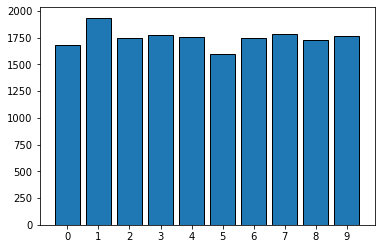

In [9]:
data.digit_distribution()

## Training SVM

In [10]:
classifiers = [
    SVMLinearClassifier(train=train, test=test, c=c)
    for c in [1, 2, 5, 10]
]

In [11]:
tuning = ClassifierTuning(classifiers=classifiers, data=train, k=5)

In [12]:
tuning.evaluate_best_model()

2022-12-12 15:30:00.844 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:299 - Evaluating classifier: [LinearSVM: Train 14000, Test 3500] - [C: 1, Degree: 1] - [C: 1]
2022-12-12 15:31:02.500 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:299 - Evaluating classifier: [LinearSVM: Train 14000, Test 3500] - [C: 2, Degree: 1] - [C: 2]
2022-12-12 15:31:55.379 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:299 - Evaluating classifier: [LinearSVM: Train 14000, Test 3500] - [C: 5, Degree: 1] - [C: 5]
2022-12-12 15:32:44.613 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:299 - Evaluating classifier: [LinearSVM: Train 14000, Test 3500] - [C: 10, Degree: 1] - [C: 10]


In [13]:
tuning.best_model

[LinearSVM: Train 11200, Test 2800] - [C: 2, Degree: 1] - [C: 2]